In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
N_origin = 1000
x_origin = np.linspace(-5,5,N_origin)

In [169]:
def curve(x):
    x = np.array(x)
    y = np.exp(-x**2/2) * ( (np.sin(6+x))**2 + 3*(np.cos(x))**2 * (np.sin(4*x))**2 +1)
    return y

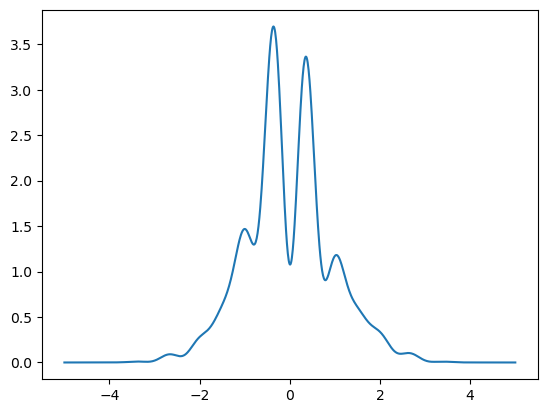

In [7]:
y_origin = curve(x_origin)
plt.plot(x_origin,y_origin)

In [9]:
# 使用多种方法去计算面积

# 通过积分计算

In [14]:
dx = 10/10000
s1 = 0
for i_x in np.linspace(-5,5,10000):
    ds = dx*curve(i_x)
    s1+=ds
print(s1)

5.750629338601294


# 均匀的随机抽样MC方法

In [16]:
count_point = 0
sum_point = 10**6
for i in range(sum_point):
    rand_x = np.random.uniform(-5, 5)
    rand_y = np.random.uniform(0, 4)
    fun_y = curve(rand_x)
    if fun_y>rand_y:
        count_point+=1
print('S = {}'.format(40*(count_point/sum_point)))

S = 5.76152


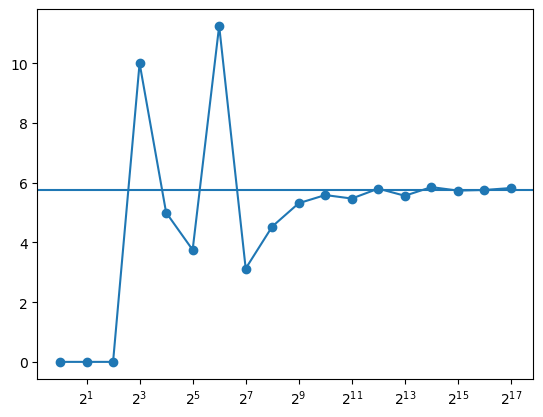

In [35]:
# 几何面积法
x_list = []
y_list = []

for i in range(18):
    x_list.append(2**i)
    count_point = 0
    sum_point = 2**i
    for j in range(sum_point):
        rand_x = np.random.uniform(-5, 5)
        rand_y = np.random.uniform(0, 4)
        fun_y = curve(rand_x)
        if fun_y>rand_y:
            count_point+=1
    s = 40*(count_point/sum_point)
    y_list.append(s)
    
plt.plot(x_list,y_list)
plt.scatter(x_list,y_list)
# 设置 x 轴为以 5 为底的对数刻度
plt.xscale('log', base=2)
plt.axhline(5.76152)  # 横线

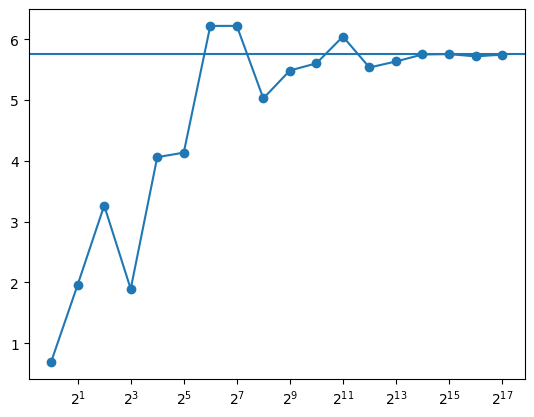

In [165]:
# 均匀随机抽样的积分法
x_list = []
y_list = []

for i in range(18):
    
    x_list.append(2**i)
    sum_point = 2**i
    s = 0
    dx = 10/sum_point
    for j in range(sum_point):
        rand_x = np.random.uniform(-5, 5)
        s+=dx*curve(rand_x)
    y_list.append(s)
    
plt.plot(x_list,y_list)
plt.scatter(x_list,y_list)
# 设置 x 轴为以 5 为底的对数刻度
plt.xscale('log', base=2)
plt.axhline(5.76152)  # 横线

# 重要性抽样

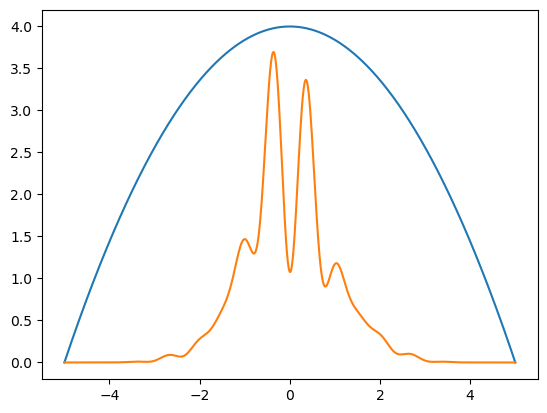

In [109]:
def test(x):
    x = np.array(x)
    y = -(x-5)*(x+5)*4/25
    return y
plt.plot(x_origin,test(x_origin))
plt.plot(x_origin,y_origin)

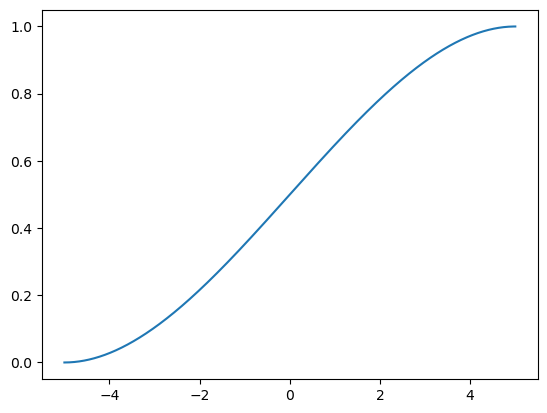

In [157]:
def test_CDF(x):
    x = np.array(x)
    y = ((-4/75*x**3+4*x)-(-4/75*(-5)**3+4*(-5)))/(80/3)
    return y
plt.plot(x_origin,test_CDF(x_origin))

In [286]:
#  求解exp
def fun_ex(x):
    return np.exp(x)
x_test = np.linspace(0,1,N_origin)
# 积分法
s = 0
dx = (1-0)/N_origin
for i in x_test:
    ds = dx*fun_ex(i)
    s+=ds
print(s)

1.7182959157996651


(0.0, 8.0)

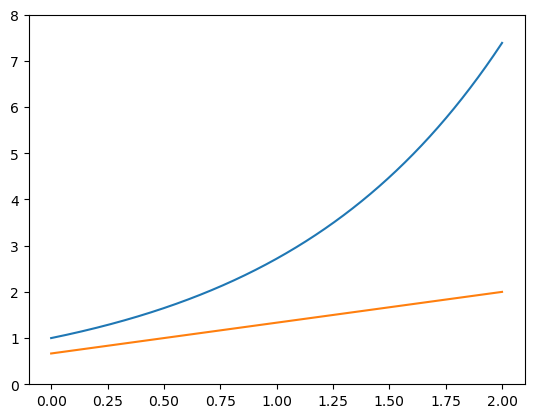

In [252]:
x_test = np.linspace(0,2,N_origin)
e_test = fun_ex(x_test)
y0_test = 2/3*(x_test+1)
plt.plot(x_test,e_test)
plt.plot(x_test,y0_test)
plt.ylim(0,8)

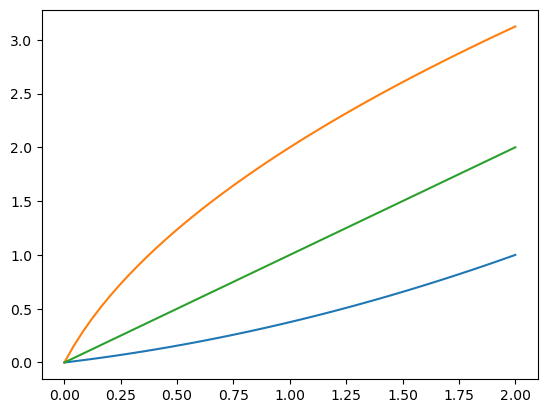

In [272]:
def fun_inver(x):
    y = (1+8*x)**0.5-1
    return y
def fun_origin(x):
    y = 2/3*(x+1)
    return y
def fun_g(x):
    y = 1/8*(x**2+2*x)
    return y
def yx(x):
    return x
test_x = np.linspace(0,2,50)
plt.plot(test_x,fun_g(test_x))
plt.plot(test_x,fun_inver(test_x))
plt.plot(test_x,yx(test_x))

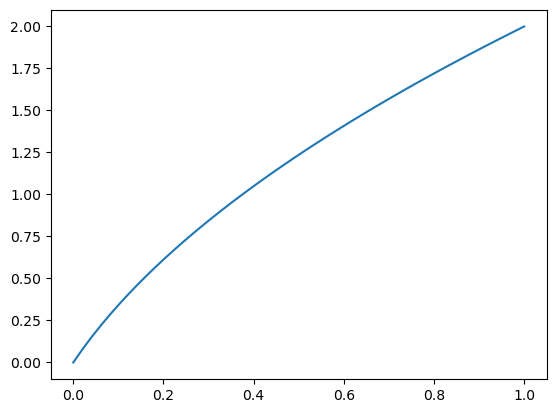

In [276]:
plt.plot(np.linspace(0,1,50),fun_inver(np.linspace(0,1,50)))

In [292]:
# 
N_origin = 10000000
s = 0
def fun_px(x):
    return 2/3*(x+1)
def fun_rand(x):
    return (1+3*x)**0.5-1

for i in range(N_origin):
    rand = np.random.uniform(0,1)
    # 获取符合分布的xi
    xi = fun_rand(rand)
    # 生成pxx
    ds = fun_ex(xi)/fun_px(xi)
    s+=ds
print(s/N_origin)

1.7182885259269733


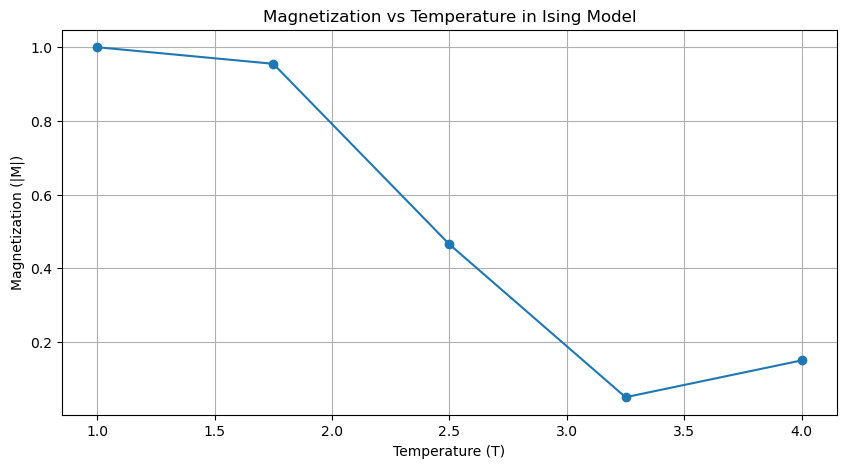

In [294]:
import numpy as np
import matplotlib.pyplot as plt

# 伊辛模型参数
L = 20  # 格子大小
N = L * L  # 总自旋数
J = 1.0  # 自旋之间的相互作用强度
K = 1.0  # 外部磁场强度

# 生成初始自旋状态
def initialize_spins(L):
    return np.random.choice([-1, 1], size=(L, L))

# 计算能量
def energy(spins):
    return -J * np.sum(spins * (np.roll(spins, 1, axis=0) + np.roll(spins, 1, axis=1)))

# Metropolis采样
def metropolis_step(spins, T):
    for _ in range(N):
        i, j = np.random.randint(0, L, size=2)
        delta_E = 2 * J * spins[i, j] * (spins[(i + 1) % L, j] + spins[i, (j + 1) % L] +
                                          spins[(i - 1) % L, j] + spins[i, (j - 1) % L])
        if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / T):
            spins[i, j] *= -1  # 翻转自旋

# 运行模拟
def run_simulation(T, steps=10000):
    spins = initialize_spins(L)
    for step in range(steps):
        metropolis_step(spins, T)
    return spins

# 主程序
temperatures = np.linspace(1.0, 4.0, 5)  # 不同温度
magnetizations = []

for T in temperatures:
    spins = run_simulation(T)
    magnetization = np.abs(np.mean(spins))
    magnetizations.append(magnetization)

# 绘制结果
plt.figure(figsize=(10, 5))
plt.plot(temperatures, magnetizations, marker='o')
plt.title('Magnetization vs Temperature in Ising Model')
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization (|M|)')
plt.grid()
plt.show()
